In [1]:
# Beginning imports such as matplotlib and pandas
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import datetime as dt

# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func, inspect

In [2]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///../Resources/hawaii.sqlite")

In [3]:
# reflect an existing database into a new model
Base = automap_base()
Base.prepare(autoload_with=engine)
# reflect the tables

inspector = inspect(engine)

In [4]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [5]:
# Save references to each table
measurement = Base.classes.measurement
station = Base.classes.station

In [6]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Precipitation Analysis

In [59]:
# Find the most recent date in the data set.
recent_date =(session.query(measurement.date)
             .order_by(measurement.date.desc())
                .first())
recent_date


('2017-08-23',)

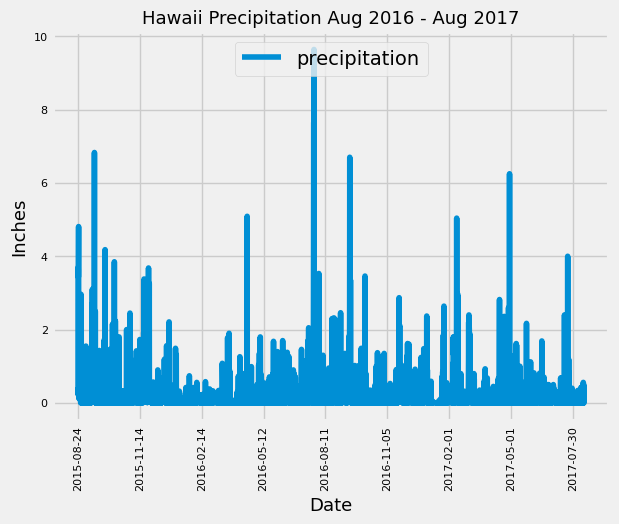

In [60]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 


twelve_months= dt.date(2017, 8, 23)-dt.timedelta(days=365) 

# Calculate the date one year from the last date in data set.

initial_date = twelve_months - dt.timedelta(days=365)

# Perform a query to retrieve the data and precipitation scores

scores= session.query(measurement.date, measurement.prcp).filter(measurement.date >= initial_date).order_by(measurement.date).all()

# Save the query results as a Pandas DataFrame. Explicitly set the column names

data_df =pd.DataFrame(scores, columns=['date', 'precipitation'])

# Sort the dataframe by date

data_df.set_index(data_df['date'], inplace =True)

# Use Pandas Plotting with Matplotlib to plot the data
clean_data_df = data_df.dropna()
clean_data_df.plot('date', 'precipitation')


plt.xlabel("Date",  size = 13)
plt.ylabel("Inches", size = 13)
plt.title("Hawaii Precipitation Aug 2016 - Aug 2017", size = 13)
plt.legend(["precipitation"],loc='upper center')
plt.xticks(rotation=90, size = 8)
plt.yticks(size = 8)
plt.show()



In [61]:
# Use Pandas to calculate the summary statistics for the precipitation data
clean_data_df.describe()


,precipitation
count,4091.000000
mean,0.205634
std,0.529369
min,0.000000
25%,0.000000
50%,0.020000
75%,0.160000
max,9.640000


# Exploratory Station Analysis

In [62]:
# Design a query to calculate the total number of stations in the dataset
session.query(station.id).count()

9

In [63]:
# Design a query to find the most active stations (i.e. which stations have the most rows?)
# List the stations and their counts in descending order.
sel = [measurement.station, func.count(measurement.id)]
active_stations = session.query(*sel).group_by(measurement.station).order_by(func.count(measurement.id).desc()).all()

active_stations

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [64]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
most_active_station = active_stations[0][0]

station_calc = session.query(func.min(measurement.tobs), func.max(measurement.tobs), func.avg(measurement.tobs)).\
                filter(measurement.station == most_active_station).all()
station_calc

[(54.0, 85.0, 71.66378066378067)]

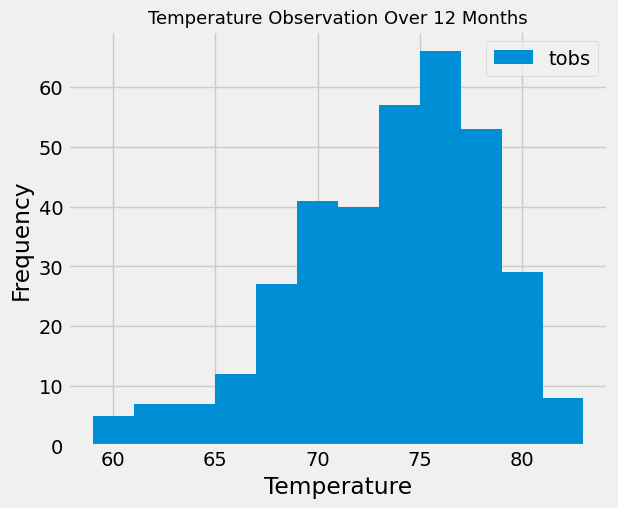

In [65]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
scores = session.query(measurement.tobs).filter(measurement.station=='USC00519281')\
    .filter(measurement.date>='2016-08-23').all()


station_temp=pd.DataFrame(scores,columns=['tobs'])
station_temp.plot.hist(bins=12)
plt.tight_layout()
plt.title("Temperature Observation Over 12 Months", size=13)
plt.xlabel("Temperature")
plt.ylabel("Frequency")

plt.show()

# Close Session

In [66]:
# Close Session
session.close()